# Xây dựng cây quyết định và rừng cây với Bộ dữ liệu về khả năng vỡ nợ của khách hàng thẻ tín dụng

### Cài đặt thư viện

In [17]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
#Dòng tiếp theo giúp hiển thị các biểu đồ
%matplotlib inline
import matplotlib as mpl 
mpl.rcParams['figure.dpi'] = 400 
import graphviz 

### Đọc dữ liệu

In [18]:
df = pd.read_csv('../datasets/default_of_credit_card_clients.csv') 
features_response = df.columns.tolist()
features_response

['ID',
 'LIMIT_BAL',
 'SEX',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_0',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'default payment next month']

| Nhóm | Tên cột (Từ ảnh của bạn) | Mô tả chi tiết |
| :--- | :--- | :--- |
| **Biến Mục tiêu** | `'default payment next month'` | **Đây là cột mục tiêu cần dự đoán (Target Variable).** <br> • **1** = Khách hàng có vỡ nợ (default) vào tháng tới. <br> • **0** = Khách hàng không vỡ nợ (thanh toán đủ/đúng hạn). |
| **Thông tin Chung** | `'ID'` | Mã định danh duy nhất cho mỗi khách hàng. |
| **Thông tin Chung** | `'LIMIT_BAL'` | Hạn mức tín dụng được cấp (đơn vị: Đài tệ). |
| **Nhân khẩu học** | `'SEX'` | Giới tính (thường được mã hóa: 1 = Nam, 2 = Nữ). |
| **Nhân khẩu học** | `'EDUCATION'` | Trình độ học vấn (ví dụ: 1 = Cao học, 2 = Đại học, 3 = Trung học, 4 = Khác). |
| **Nhân khẩu học** | `'MARRIAGE'` | Tình trạng hôn nhân (ví dụ: 1 = Đã kết hôn, 2 = Độc thân, 3 = Khác). |
| **Nhân khẩu học** | `'AGE'` | Tuổi của khách hàng (tính bằng năm). |
| **Lịch sử Thanh toán** | `'PAY_0'` | Trạng thái thanh toán của **tháng 9, 2005** (tháng gần nhất). |
| **Lịch sử Thanh toán** | `'PAY_2'` | Trạng thái thanh toán của **tháng 8, 2005**. |
| **Lịch sử Thanh toán** | `'PAY_3'` | Trạng thái thanh toán của **tháng 7, 2005**. |
| **Lịch sử Thanh toán** | `'PAY_4'` | Trạng thái thanh toán của **tháng 6, 2005**. |
| **Lịch sử Thanh toán** | `'PAY_5'` | Trạng thái thanh toán của **tháng 5, 2005**. |
| **Lịch sử Thanh toán** | `'PAY_6'` | Trạng thái thanh toán của **tháng 4, 2005** (tháng xa nhất). |
| **Lịch sử Sao kê** | `'BILL_AMT1'` | Số tiền trên sao kê của **tháng 9, 2005** (tháng gần nhất). |
| **Lịch sử Sao kê** | `'BILL_AMT2'` | Số tiền trên sao kê của **tháng 8, 2005**. |
| **Lịch sử Sao kê** | `'BILL_AMT3'` | Số tiền trên sao kê của **tháng 7, 2005**. |
| **Lịch sử Sao kê** | `'BILL_AMT4'` | Số tiền trên sao kê của **tháng 6, 2005**. |
| **Lịch sử Sao kê** | `'BILL_AMT5'` | Số tiền trên sao kê của **tháng 5, 2005**. |
| **Lịch sử Sao kê** | `'BILL_AMT6'` | Số tiền trên sao kê của **tháng 4, 2005** (tháng xa nhất). |
| **Lịch sử Chi trả** | `'PAY_AMT1'` | Số tiền khách hàng đã thanh toán vào **tháng 9, 2005** (tháng gần nhất). |
| **Lịch sử Chi trả** | `'PAY_AMT2'` | Số tiền khách hàng đã thanh toán vào **thàg 8, 2005**. |
| **Lịch sử Chi trả** | `'PAY_AMT3'` | Số tiền khách hàng đã thanh toán vào **tháng 7, 2005**. |
| **Lịch sử Chi trả** | `'PAY_AMT4'` | Số tiền khách hàng đã thanh toán vào **tháng 6, 2005**. |
| **Lịch sử Chi trả** | `'PAY_AMT5'` | Số tiền khách hàng đã thanh toán vào **tháng 5, 2005**. |
| **Lịch sử Chi trả** | `'PAY_AMT6'` | Số tiền khách hàng đã thanh toán vào **tháng 4, 2005** (tháng xa nhất). |

#### Lưu ý quan trọng khi phân tích
Dòng thời gian (Timeline): Đây là điều quan trọng nhất. Các cột có số 1 (hoặc 0 trong PAY_0) là tháng gần nhất (tháng 9/2005). Các cột có số 6 là tháng xa nhất (tháng 4/2005). Dữ liệu đi lùi về quá khứ.

Ý nghĩa của các cột PAY_...: Đây là các cột cực kỳ quan trọng và có ý nghĩa đặc biệt:

+ -2: Không có giao dịch / không sử dụng thẻ trong tháng.

+ -1: Đã thanh toán đầy đủ (Paid in full).

+ 0: Đã thanh toán số tiền tối thiểu (Minimum payment) hoặc sử dụng hết hạn mức (Credit limit).

+ 1: Trễ hạn thanh toán 1 tháng.

+ 2: Trễ hạn thanh toán 2 tháng.

... (và tương tự cho đến 8 hoặc 9 tháng).

### Tiền xử lý dữ liệu

#### Lựa chọn đặc trưng

In [19]:
#Lập danh sách các cột cần xóa không phải là tính năng hoặc biến phản hồi
items_to_remove = ['ID', 'SEX', 'PAY_2', 'PAY_3',\
'PAY_4', 'PAY_5', 'PAY_6',\
'EDUCATION_CAT', 'graduate school',\
'high school', 'none',\
'others', 'university']

features_response = [item for item in features_response if item not
in items_to_remove]
features_response

['LIMIT_BAL',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_0',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'default payment next month']

Bộ đặc trưng mới tập trung vào một giả thuyết:

"Khả năng vỡ nợ chủ yếu được quyết định bởi tình trạng nhân khẩu học cơ bản (Tuổi, Học vấn, Hôn nhân), hạn mức tín dụng (LIMIT_BAL), toàn bộ lịch sử về SỐ TIỀN (BILL_AMT và PAY_AMT trong 6 tháng), nhưng chỉ cần TRẠNG THÁI thanh toán của tháng gần nhất (PAY_0)."

### Chuẩn bị dữ liệu cho tập train và tập test

In [20]:
from sklearn.model_selection import train_test_split
from sklearn import tree
#Chia dữ liệu thành các tập huấn luyện và thử nghiệm bằng cách sử dụng cùng một hạt giống ngẫu nhiên

X_train, X_test, y_train, y_test = \
train_test_split(df[features_response[:-1]].values,
df['default payment next month'].values,
test_size=0.2, random_state=24)


Bước này chia bộ dữ liệu thành 2 phần một cách ngẫu nhiên:

+ Tập Huấn luyện (Training Set): Phần lớn dữ liệu (80%) dùng để dạy hoặc "fit" mô hình (**test_size=0.2**).

+ Tập Kiểm tra (Test Set): Phần nhỏ dữ liệu (20%) được giữ bí mật với mô hình. Nó chỉ được dùng một lần duy nhất ở cuối cùng để đánh giá xem mô hình hoạt động tốt đến đâu trên dữ liệu mới mà nó chưa từng thấy

## 1. Xây dựng cây quyết định bằng thư viện Scikit-Learn

Input: là một DataFrame nơi mỗi hàng là một khách hàng và mỗi cột là một đặc trưng (feature) của khách hàng đó.

Output: 

+ Tên cột: 'default payment next month'

+ Mô tả: Đây là biến mục tiêu (target variable) hay còn gọi là "nhãn" (label). Nó cho mô hình biết khách hàng có bị vỡ nợ (giá trị là 1) hay không (giá trị là 0).

+ Dạng dữ liệu: Nó sẽ là một mảng (hoặc một pandas Series) chỉ chứa các giá trị 0 và 1.

### 1.1 Xây dựng cây quyết định từ lớp DecisionTreeClassifier có trong thư viện Scikit-Learn

In [21]:
# Cây sẽ phát triển đến độ sâu tối đa là 2
dt = tree.DecisionTreeClassifier(max_depth=2)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

Khởi tạo Mô hình với max_depth=2:

+ Chống Overfitting (Học vẹt): Đây là lý do quan trọng nhất. Chúng ta hy sinh một chút độ chính xác trên tập train để đổi lấy độ chính xác cao hơn (và đáng tin cậy hơn) trên tập test.

+ Tăng Tính Diễn Giải (Interpretability): Mô hình không phải là "hộp đen". Bạn có thể vẽ nó ra, và bất kỳ ai (kể cả sếp của bạn) cũng có thể hiểu 100% logic mà nó dùng để ra quyết định. Điều này cực kỳ quan trọng trong các ngành như tài chính, y tế.

+ Tăng Tốc độ (Speed): Một cái cây nông huấn luyện và dự đoán nhanh hơn rất nhiều, tốn ít tài nguyên tính toán hơn.

Kết luận: chọn max_depth=2 không phải vì nó cho độ chính xác cao nhất trên lý thuyết, mà vì nó tạo ra một mô hình hữu ích, an toàn, dễ hiểu và có khả năng áp dụng vào thực tế tốt.

### 1.2 Hiển thị cây quyết định với package graphviz

Kết quả thu được: 


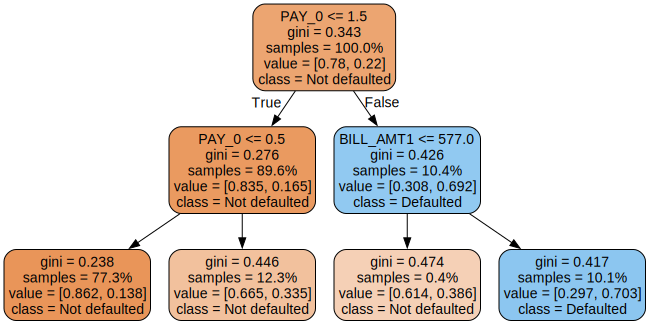

In [22]:
dot_data = tree.export_graphviz(dt, 
                                out_file=None,
                                filled=True,
                                rounded=True,
                                feature_names=\
                                features_response[:-1],
                                proportion=True,
                                class_names=['Not defaulted', 'Defaulted'])
graph = graphviz.Source(dot_data)
print("Kết quả thu được: ")
graph

##### Tóm tắt các chỉ số trong mỗi ô
PAY_0 <= 1.5 (Dòng 1): Câu hỏi (quy tắc) mà nút này dùng để chia dữ liệu.

gini = ... (Dòng 2): Chỉ số Gini, đo độ "lẫn lộn" hay "không tinh khiết".

+ gini = 0.0 nghĩa là hoàn toàn "tinh khiết" (ví dụ: 100% vỡ nợ, hoặc 0% vỡ nợ).

+ gini = 0.5 nghĩa là lẫn lộn nhất (50% vỡ nợ, 50% không vỡ nợ).

+ Có thể thấy các nút lá bên trái (cam) có Gini thấp hơn (0.238) so với nút gốc (0.343), nghĩa là mô hình đã làm tốt việc "làm sạch" dữ liệu.

samples = ...% (Dòng 3): Tỷ lệ % mẫu trong tập huấn luyện rơi vào nút này.

value = [..., ...] (Dòng 4): Tỷ lệ phân bổ của hai lớp.

[0.78, 0.22] nghĩa là 78% thuộc class 0 (Không vỡ nợ) và 22% thuộc class 1 (Vỡ nợ).

class = ... (Dòng 5): Dự đoán cuối cùng (lớp đa số) cho bất kỳ mẫu nào rơi vào nút này. Màu cam là Not defaulted, màu xanh là Defaulted.

Về cơ bản, mô hình đã học được rằng đặc trưng quan trọng nhất để dự đoán vỡ nợ là PAY_0 (trạng thái thanh toán của tháng gần nhất).

Mô hình này chia khách hàng làm 2 nhóm chính:

+ Nhóm 1: "Ít rủi ro" (Nhánh trái, chiếm 89.6% dân số): Đây là những người có PAY_0 <= 1.5 (tức là không trễ hạn, trễ 1 tháng, hoặc đã trả). Trong nhóm này, những người trả đủ/tối thiểu (PAY_0 <= 0.5) là an toàn nhất (chỉ 13.8% vỡ nợ). Những người trễ 1 tháng (PAY_0 = 1) có rủi ro cao hơn (33.5% vỡ nợ), nhưng vẫn được dự đoán là Not defaulted.

+ Nhóm 2: "Rủi ro cao" (Nhánh phải, chiếm 10.4% dân số): Đây là những người có PAY_0 > 1.5 (tức là đã trễ 2 tháng trở lên). Trong nhóm này, nếu họ còn nợ một số tiền đáng kể (BILL_AMT1 > 577), họ sẽ được phân loại vào nhóm rủi ro cao nhất (70.3% vỡ nợ) và được dự đoán là Defaulted (Vỡ nợ).

→ Kết luận nhanh: Mô hình xác định rằng "việc trễ 2 tháng trở lên trong tháng gần nhất" là dấu hiệu nguy hiểm số một.

### 1.3 Kết luận

Mô hình Cây Quyết Định được xây dựng nhằm dự đoán biến mục tiêu ‘default payment next month’, cho biết khách hàng có vỡ nợ (1) hay không vỡ nợ (0). Với tham số max_depth = 2, mô hình được thiết kế để tránh overfitting, dễ diễn giải, và tối ưu cho ứng dụng thực tế trong lĩnh vực tài chính.

Kết quả cho thấy PAY_0 (tình trạng thanh toán tháng gần nhất) là yếu tố quan trọng nhất trong dự báo rủi ro. Mô hình chia khách hàng thành hai nhóm:

+ Nhóm ít rủi ro (PAY_0 ≤ 1.5) – chiếm gần 90%, gồm người trả đúng hạn hoặc trễ nhẹ, tỷ lệ vỡ nợ thấp (~13–33%).

+ Nhóm rủi ro cao (PAY_0 > 1.5) – khoảng 10%, gồm người trễ từ 2 tháng trở lên, đặc biệt nếu còn nợ cao (BILL_AMT1 > 577) thì nguy cơ vỡ nợ tới ~70%.

Chỉ số Gini giảm qua các nút cho thấy mô hình đã phân tách tốt giữa hai nhóm rủi ro.
Tóm lại, việc trễ hạn trên 2 tháng là dấu hiệu cảnh báo rủi ro vỡ nợ mạnh nhất, và mô hình với độ sâu nhỏ giúp dễ hiểu, đáng tin cậy và phù hợp cho phân tích tài chính thực tiễn.

## 2. Tìm tham số tối ưu cho cây quyết định bằng GridSearchCV và vẽ biểu đồ đánh giá mô hình với các tham số khác nhau

Inputs (Đầu vào):
+ dt (Mô hình): Một "bản thiết kế" Cây quyết định tree.DecisionTreeClassifier() còn trống, chưa được huấn luyện.

+ params (Lưới tham số): Một "thực đơn" các giá trị bạn muốn thử, trong trường hợp này là {'max_depth': [1, 2, 4, 6, 8, 10, 12]}.

+ X_train, y_train (Dữ liệu): Dữ liệu huấn luyện và nhãn tương ứng. GridSearchCV sẽ tự động dùng cv=4 (kiểm định chéo 4 vòng) bên trong khối dữ liệu này.

+ scoring='roc_auc' (Thước đo): Tiêu chí để "chấm điểm" và so sánh các mô hình.

+ cv=4 (Chiến lược kiểm định): Cách thức chia nhỏ tập X_train để kiểm tra chéo (chia làm 4 phần).

Outputs (Đầu ra):

+ cv.best_params_: Một dictionary chứa tham số tốt nhất, ví dụ: {'max_depth': 6}.

+ cv.best_score_: Điểm roc_auc trung bình cao nhất đạt được (ví dụ: 0.78).

+ cv.best_estimator_: Mô hình tốt nhất, đã được tự động huấn luyện lại (refit) trên toàn bộ X_train với tham số tốt nhất. Đây là mô hình bạn sẽ dùng để dự đoán trên X_test.

+ cv.cv_results_: Đây là đầu ra quan trọng nhất cho công việc thứ hai (vẽ biểu đồ). Nó là một bảng (dictionary) khổng lồ chứa kết quả chi tiết của tất cả các lần chạy (cả 7 tham số x 4 vòng cv).

### 2.1 Tạo cây quyết định và xác định các giá trị tham số có thể chọn để tìm tham số tối ưu

Đây là một bước nâng cao rất thông minh và là một kỹ thuật chuẩn mực trong khoa học dữ liệu. Chuyển từ việc "đoán mò" (như chọn max_depth=2 ở lần trước) sang một quy trình "Tinh chỉnh Siêu tham số" (Hyperparameter Tuning) một cách có hệ thống.

Tự động hóa việc thử nghiệm 7 mô hình khác nhau, sử dụng một phương pháp đánh giá (Kiểm định chéo 4 vòng) cực kỳ đáng tin cậy để tìm ra mô hình vô địch, và sau đó huấn luyện mô hình vô địch đó.

In [23]:
from sklearn.model_selection import GridSearchCV
params = {'max_depth':[1, 2, 4, 6, 8, 10, 12]} 
dt = tree.DecisionTreeClassifier() 
cv = GridSearchCV(dt, param_grid=params, scoring='roc_auc',
                    n_jobs=None, refit=True, cv=4, verbose=1,
                    error_score=np.nan,
                    return_train_score=True) 
cv.fit(X_train, y_train)

Fitting 4 folds for each of 7 candidates, totalling 28 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [1, 2, 4, 6, 8, 10, 12]},
             return_train_score=True, scoring='roc_auc', verbose=1)

| **Tham số** | **Ý nghĩa chính** | **Vai trò** |
|--------------|------------------|--------------|
| `scoring='roc_auc'` | Đánh giá khả năng phân biệt giữa 2 lớp | Đo hiệu suất mô hình |
| `cv=4` | Chia dữ liệu làm 4 phần để kiểm định chéo | Giảm rủi ro chia dữ liệu ngẫu nhiên |
| `return_train_score=True` | Trả cả điểm train & test | Đánh giá bias – variance, phát hiện overfitting |

In [24]:
# Lấy ra bộ tham số "vô địch"
best_parameters = cv.best_params_
print(f"Bộ tham số tốt nhất (The winner): {best_parameters}")

# Lấy ra điểm số cao nhất tương ứng với bộ tham số tốt nhất
best_score = cv.best_score_
print(f"Điểm ROC-AUC trung bình tốt nhất: {best_score:.4f}")

# Lấy ra mô hình "vô địch" đã được huấn luyện sẵn
best_model = cv.best_estimator_
print(f"Mô hình tốt nhất đã được huấn luyện: {best_model}")

# Lấy ra "bảng điểm" chi tiết của toàn bộ cuộc thi
all_results = cv.cv_results_

# Chuyển nó sang DataFrame của pandas để xem cho đẹp
results_df = pd.DataFrame(all_results)

# In ra các cột quan trọng
print("Bảng điểm chi tiết (cv_results_):")
print(results_df[[
    'param_max_depth', 
    'mean_test_score',  # Điểm kiểm định trung bình (đường màu cam)
    'mean_train_score', # Điểm huấn luyện trung bình (đường màu xanh)
    'std_test_score',   # Độ lệch chuẩn (thanh lỗi trên biểu đồ)
    'rank_test_score'   # Xếp hạng
]])


Bộ tham số tốt nhất (The winner): {'max_depth': 6}
Điểm ROC-AUC trung bình tốt nhất: 0.7441
Mô hình tốt nhất đã được huấn luyện: DecisionTreeClassifier(max_depth=6)
Bảng điểm chi tiết (cv_results_):
   param_max_depth  mean_test_score  mean_train_score  std_test_score  \
0                1         0.643482          0.643481        0.002930   
1                2         0.698540          0.698629        0.005935   
2                4         0.740463          0.750641        0.003171   
3                6         0.744117          0.776145        0.007720   
4                8         0.728714          0.803645        0.004424   
5               10         0.710729          0.839533        0.004945   
6               12         0.674744          0.883772        0.008412   

   rank_test_score  
0                7  
1                5  
2                2  
3                1  
4                3  
5                4  
6                6  


##### Kết quả này rất rõ ràng và đáng tin cậy.

"Nhà vô địch" là max_depth=6. Nó cho điểm hiệu suất thực tế (mean_test_score) cao nhất là 0.7437 (xếp hạng 1).

Bảng điểm xác nhận rõ ràng:

+ Nếu cây nông hơn (max_depth = 1, 2, 4), hiệu suất sẽ thấp hơn (bị underfitting).

+ Nếu cây sâu hơn (max_depth = 8, 10, 12), hiệu suất thực tế cũng giảm đi (bị overfitting).

Độ lệch chuẩn (std_test_score) rất nhỏ, cho thấy kết quả này rất ổn định và không phải do may mắn ngẫu nhiên.

→ Kết luận: Bạn đã tìm thấy mô hình tối ưu. Giờ đây bạn có thể tự tin sử dụng cv.best_estimator_ (là mô hình max_depth=6) để dự đoán.

### 2.2 Vẽ biểu đồ đánh giá mô hình với các tham số chiều sâu của cây khác nhau

In [25]:
cv_results_df = pd.DataFrame(cv.cv_results_)
#Xem tên của các cột còn lại trong DataFrame kết quả
cv_results_df.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_max_depth', 'params', 'split0_test_score', 'split1_test_score',
       'split2_test_score', 'split3_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score', 'split0_train_score',
       'split1_train_score', 'split2_train_score', 'split3_train_score',
       'mean_train_score', 'std_train_score'],
      dtype='object')

Text(0, 0.5, 'ROC AUC')

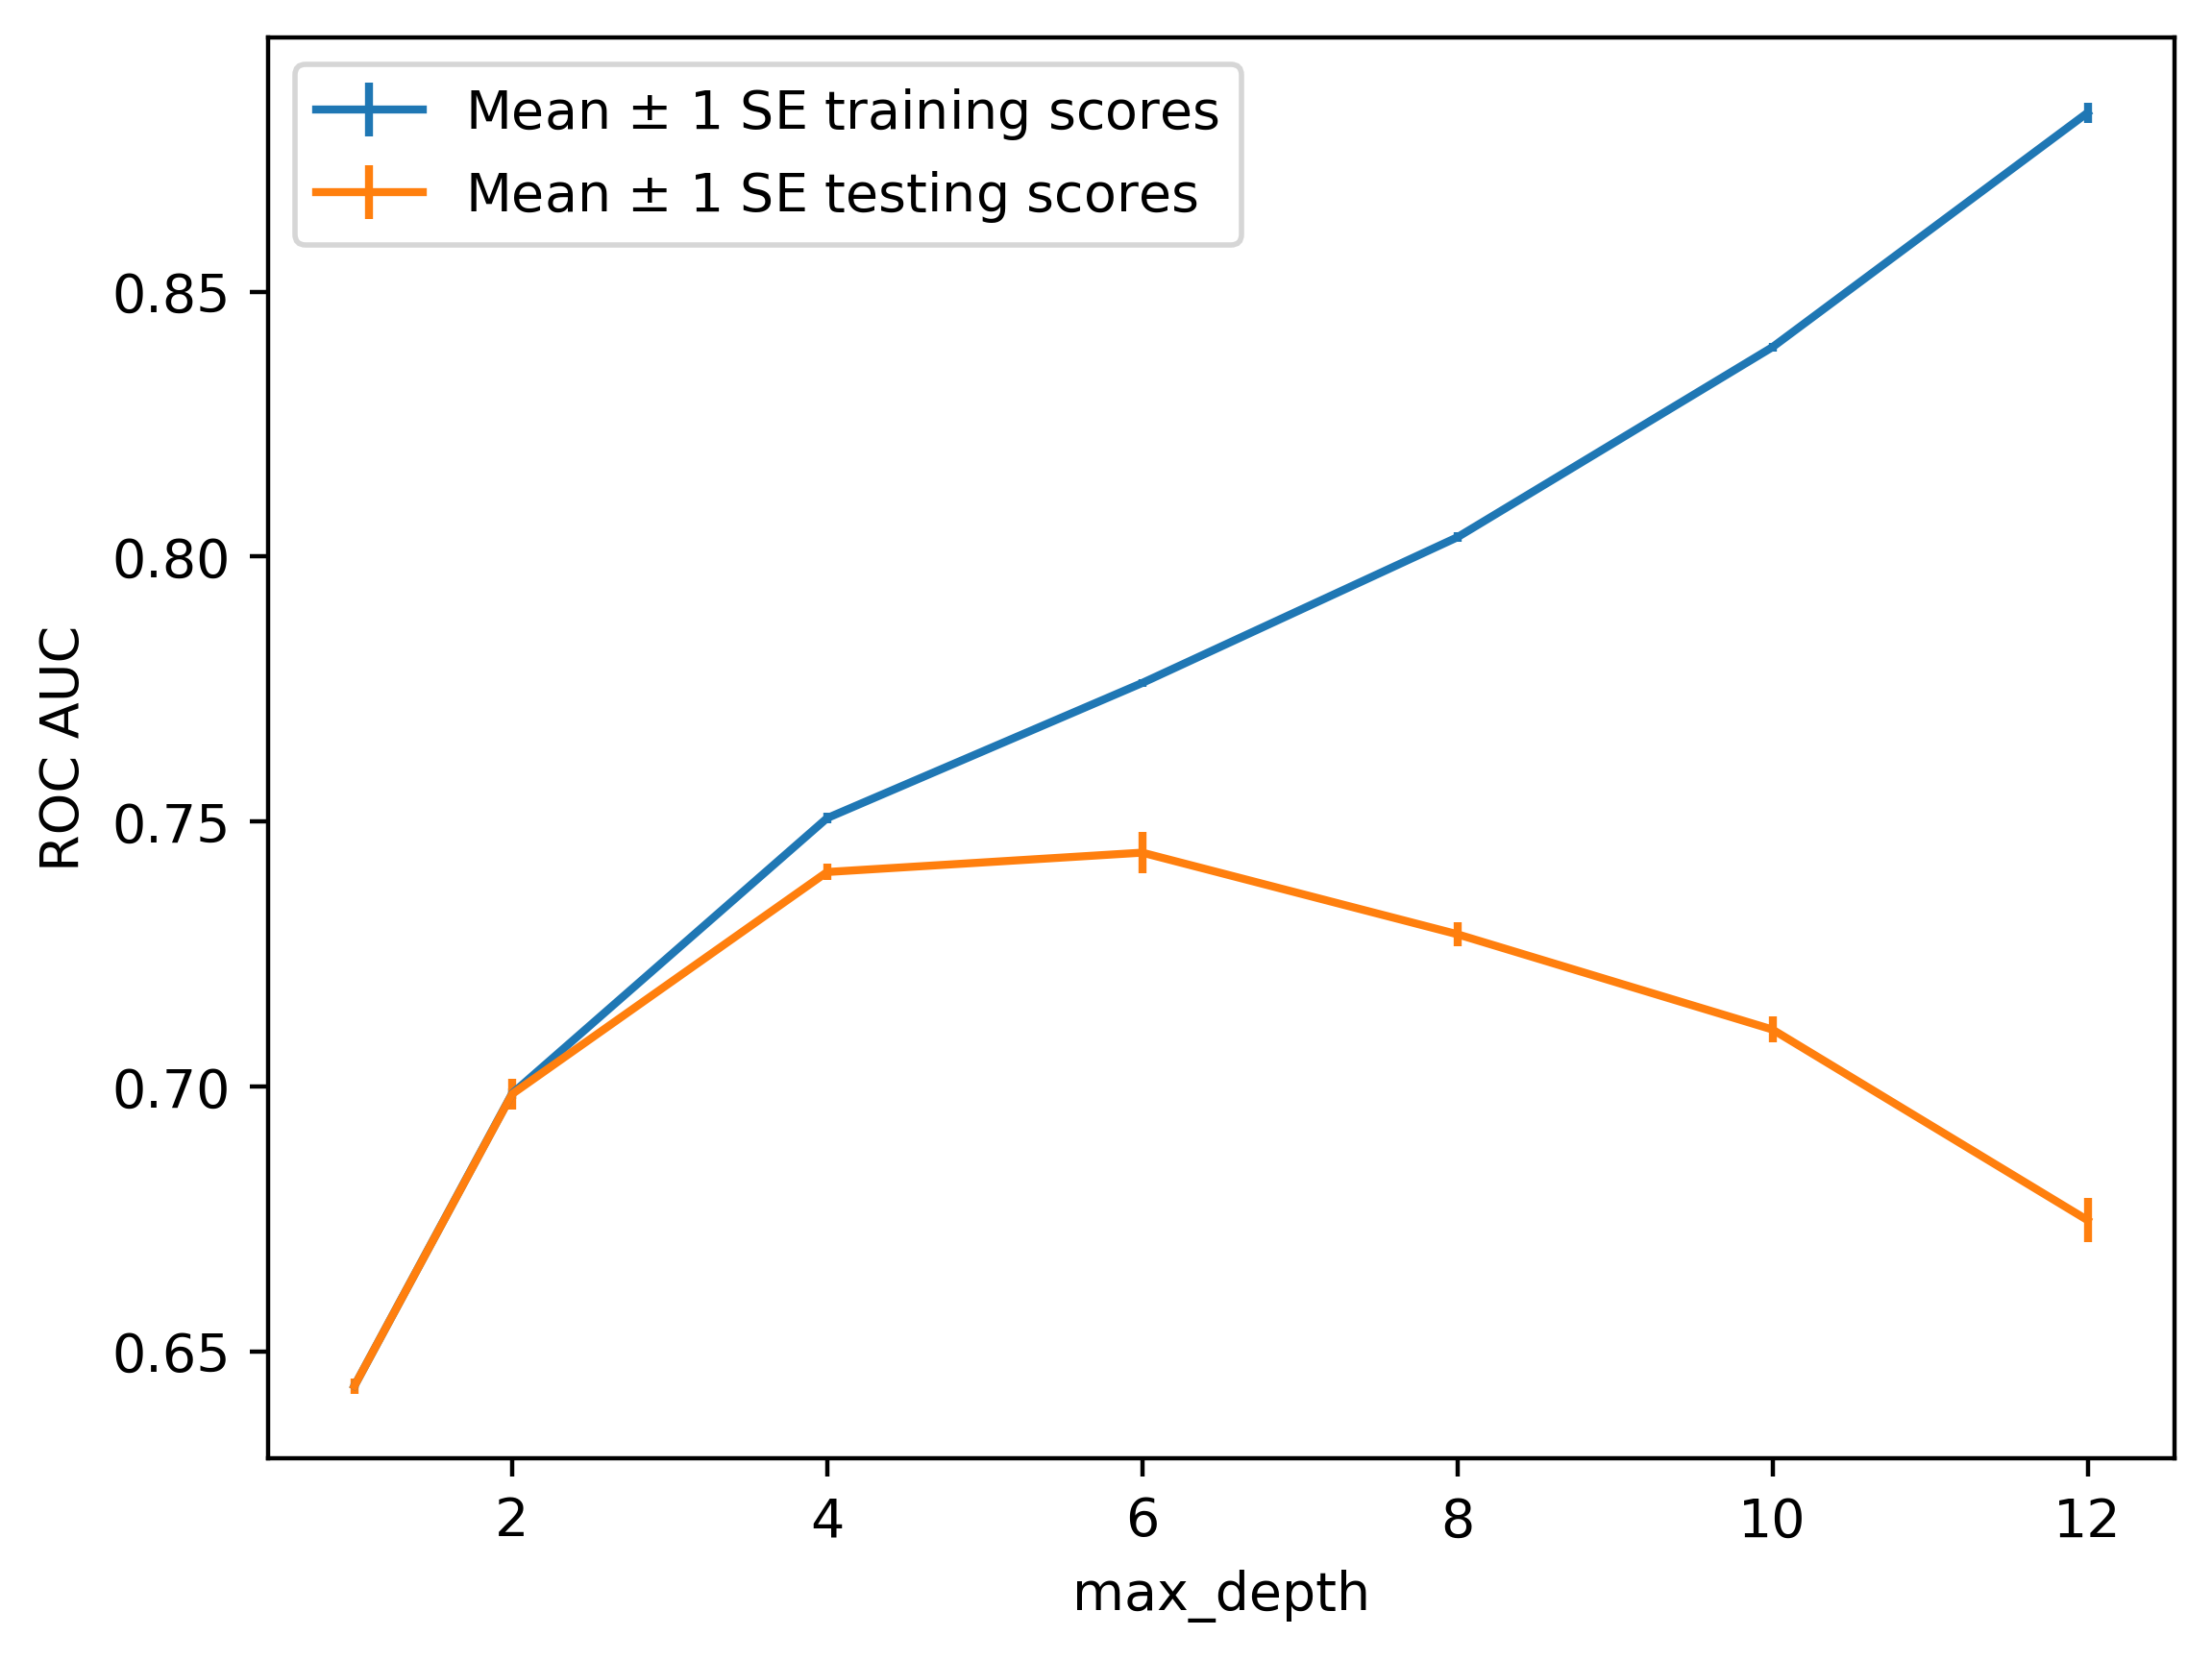

In [26]:
# Vẽ biểu đồ
ax = plt.axes()
ax.errorbar(cv_results_df['param_max_depth'],
            cv_results_df['mean_train_score'],
            yerr=cv_results_df['std_train_score']/np.sqrt(4),
            label='Mean $\pm$ 1 SE training scores')

ax.errorbar(cv_results_df['param_max_depth'],
            cv_results_df['mean_test_score'],
            yerr=cv_results_df['std_test_score']/np.sqrt(4),
            label='Mean $\pm$ 1 SE testing scores')
ax.legend()
plt.xlabel('max_depth')
plt.ylabel('ROC AUC')

Mục tiêu của Biểu đồ: Biểu đồ này giúp tìm ra max_depth (độ sâu) tốt nhất. Nó so sánh hiệu suất "học vẹt" (Training, màu xanh) với hiệu suất "thực tế" (Testing, màu cam).

+ Giai đoạn 1: Underfitting (Học chưa tới)
Ở các độ sâu thấp (phía bên trái), cả hai đường xanh và cam đều có điểm số thấp. Điều này có nghĩa là mô hình còn quá đơn giản, chưa học đủ quy luật của dữ liệu.

+ Giai đoạn 2: Điểm Tối ưu (Sweet Spot)
Khi độ sâu tăng, đường màu cam (hiệu suất thực tế) tăng lên và đạt đến điểm cao nhất (đỉnh). Đây chính là max_depth tốt nhất, vì nó cân bằng hoàn hảo giữa độ phức tạp và khả năng dự đoán.

+ Giai đoạn 3: Overfitting (Học vẹt)
Sau khi qua đỉnh, khi độ sâu tiếp tục tăng (phía bên phải), đường màu xanh (học vẹt) tiếp tục tăng. Nhưng đường màu cam (thực tế) lại lao dốc. Khoảng cách ngày càng lớn giữa hai đường này cho thấy mô hình đang học thuộc lòng "nhiễu" và mất khả năng dự đoán dữ liệu mới.

→ Kết luận: Luôn chọn max_depth tương ứng với đỉnh của đường màu cam (Testing), vì đó là mô hình có khả năng tổng quát hóa (dự đoán dữ liệu lạ) tốt nhất. 

→ Quyết định cuối cùng: Dựa trên biểu đồ này, nên chọn giá trị max_depth nào cho điểm cao nhất trên đường màu cam. Có vẻ như đó là max_depth=6

### 2.3 Thử nghiệm trên mô hình tốt nhất


In [27]:
# (Đã có X_test và y_test từ bước train_test_split)
print("\n--- Sử dụng mô hình tốt nhất để dự đoán trên X_test ---")
predictions_on_test_data = best_model.predict(X_test)
print(f"Một vài dự đoán đầu tiên: {predictions_on_test_data[:10]}")


--- Sử dụng mô hình tốt nhất để dự đoán trên X_test ---
Một vài dự đoán đầu tiên: [0 1 0 0 0 0 0 0 0 0]


--- 1. Độ chính xác (Accuracy) trên tập Test ---
Mô hình dự đoán đúng: 81.67%


--- 2. Ma trận nhầm lẫn (Confusion Matrix) ---
[[4445  198]
 [ 902  455]]


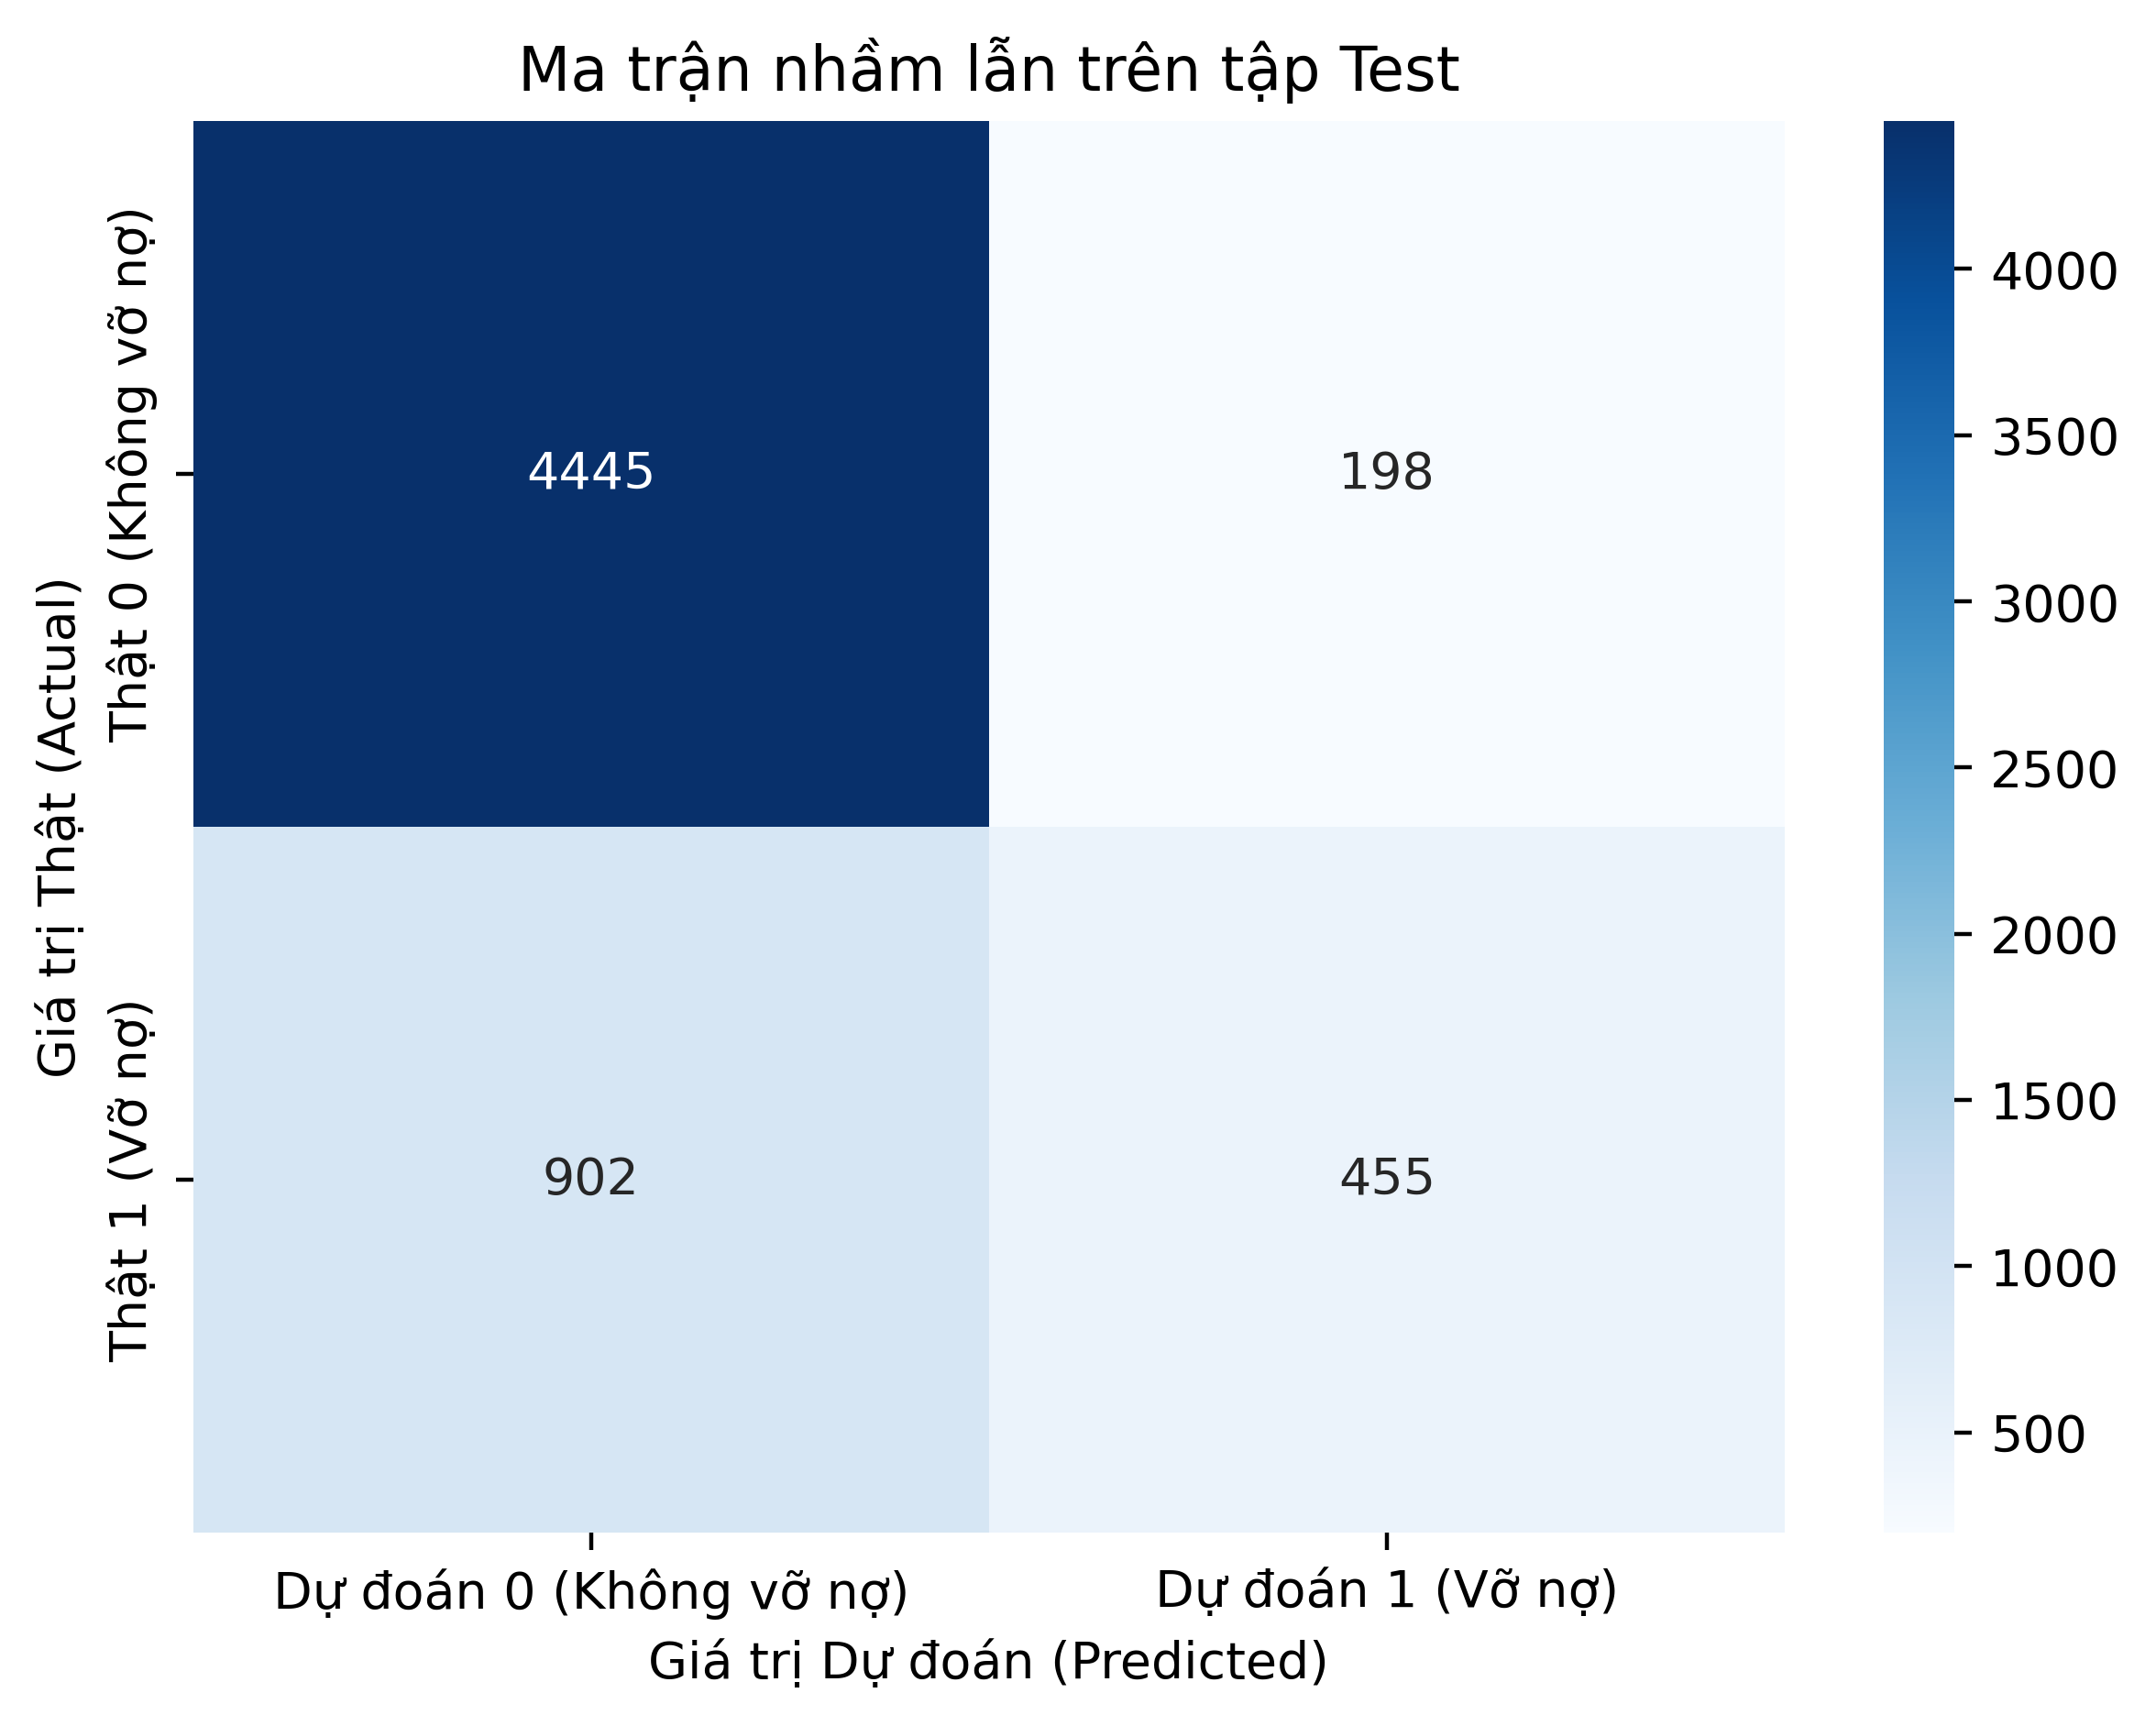

--- 3. Báo cáo Phân loại (Classification Report) ---
                     precision    recall  f1-score   support

Lớp 0 (Không vỡ nợ)       0.83      0.96      0.89      4643
      Lớp 1 (Vỡ nợ)       0.70      0.34      0.45      1357

           accuracy                           0.82      6000
          macro avg       0.76      0.65      0.67      6000
       weighted avg       0.80      0.82      0.79      6000



In [28]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# y_test: Đây là "đáp án thật" mà bạn đã giấu đi
# predictions_on_test_data: Đây là "phiếu trả lời" của mô hình

# 1. TÍNH ĐỘ CHÍNH XÁC (ACCURACY)
accuracy = accuracy_score(y_test, predictions_on_test_data)
print(f"--- 1. Độ chính xác (Accuracy) trên tập Test ---")
print(f"Mô hình dự đoán đúng: {accuracy * 100:.2f}%")
print("\n")


# 2. HIỂN THỊ MA TRẬN NHẦM LẪN (CONFUSION MATRIX)
print(f"--- 2. Ma trận nhầm lẫn (Confusion Matrix) ---")
cm = confusion_matrix(y_test, predictions_on_test_data)
print(cm)

# Trực quan hóa ma trận nhầm lẫn cho dễ đọc
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Dự đoán 0 (Không vỡ nợ)', 'Dự đoán 1 (Vỡ nợ)'], 
            yticklabels=['Thật 0 (Không vỡ nợ)', 'Thật 1 (Vỡ nợ)'])
plt.title('Ma trận nhầm lẫn trên tập Test')
plt.ylabel('Giá trị Thật (Actual)')
plt.xlabel('Giá trị Dự đoán (Predicted)')
plt.show()

# 3. HIỂN THỊ BÁO CÁO PHÂN LOẠI CHI TIẾT
print(f"--- 3. Báo cáo Phân loại (Classification Report) ---")
# target_names dùng để đặt tên cho các lớp 0 và 1
report = classification_report(y_test, predictions_on_test_data, 
                               target_names=['Lớp 0 (Không vỡ nợ)', 'Lớp 1 (Vỡ nợ)'])
print(report)

Mô hình có độ chính xác (Accuracy) 81.65%, trông có vẻ tốt nhưng thực chất là không hiệu quả.

Lý do chính là:

+ Mô hình làm RẤT TỐT Lớp 0 (Không vỡ nợ): Nó tìm thấy 96% số khách hàng an toàn.

+ Mô hình làm RẤT TỆ Lớp 1 (Vỡ nợ): Đây là mục tiêu chính, nhưng mô hình lại bỏ lọt 66% số khách hàng rủi ro (Recall = 0.34).

→ Kết luận: Mô hình này quá "an toàn", nó giỏi nói ai không vỡ nợ, nhưng lại thất bại trong nhiệm vụ chính là cảnh báo ai sẽ vỡ nợ. Ngân hàng sẽ mất rất nhiều tiền vì 902 trường hợp bị bỏ lọt (lỗi "False Negative").

### 2.4 Kết luận

Việc sử dụng GridSearchCV giúp tìm tham số tối ưu một cách khoa học, thay vì chọn ngẫu nhiên. Kết quả cho thấy max_depth = 6 là giá trị tốt nhất, đạt mean_test_score = 0.7437 với độ lệch chuẩn nhỏ, chứng tỏ mô hình ổn định và đáng tin cậy.

Khi cây quá nông (1–4), mô hình underfitting — học chưa đủ; khi cây quá sâu (8–12), mô hình overfitting — học vẹt, mất khả năng tổng quát hóa. Độ sâu 6 chính là “điểm ngọt” (sweet spot), cân bằng giữa độ phức tạp và hiệu suất thực tế.

Dù mô hình đạt độ chính xác 81.65%, nó vẫn thiên lệch về lớp an toàn, phát hiện tốt khách hàng không vỡ nợ (96%) nhưng bỏ sót tới 66% khách hàng rủi ro. Vì vậy, cần tái cân bằng dữ liệu hoặc điều chỉnh trọng số lớp để cải thiện khả năng nhận diện nhóm có nguy cơ vỡ nợ, giúp mô hình hữu ích hơn trong thực tế.

## 3. Xây dựng rừng cây (random forest)

Input:

+ 'LIMIT_BAL'

+ 'EDUCATION'

+ 'MARRIAGE'

+ 'AGE'

+ 'PAY_0'

+ 'BILL_AMT1'... 'BILL_AMT6'

+ 'PAY_AMT1'... 'PAY_AMT6'

Output:
+ 'default payment next month'

+ Giá trị: Vẫn là mảng chứa các số 0 (Không vỡ nợ) và 1 (Vỡ nợ).

### 3.1 Tạo rừng cây với lớp RandomForestClassifier trong Scikit-Learn

Mô hình Cây quyết định (max_depth=6) của bạn hoạt động kém vì nó quá đơn giản và bỏ lọt 66% khách hàng rủi ro (Recall = 0.34).

Bây giờ, chúng ta sẽ xây dựng một mô hình Rừng Cây (Random Forest). Đây là một mô hình "quần thể" (ensemble) mạnh mẽ, nó tập hợp "trí tuệ tập thể" của hàng trăm cây quyết định khác nhau để đưa ra một dự đoán chung.

In [29]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier\
(n_estimators=10, criterion='gini', max_depth=3,
min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0,
max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0,
bootstrap=True, oob_score=False, n_jobs=None,
random_state=4, verbose=0, warm_start=False, class_weight=None)

### 3.2 Tìm tham số tối ưu cho mô hình rừng cây và thực hiện train với tham số tối ưu đó

Tại sao phải tìm tham số tối ưu (Hyperparameter Tuning)?

Việc tìm tham số tối ưu là bước bắt buộc để mô hình hoạt động hiệu quả. Nếu chỉ dùng cài đặt mặc định, mô hình có thể quá phức tạp (overfitting) — học vẹt dữ liệu huấn luyện, hoặc quá đơn giản (underfitting) — không học đủ quy luật. Ngoài ra, trong các bài toán mất cân bằng dữ liệu (imbalance) như dự đoán vỡ nợ, mô hình dễ thiên lệch về lớp chiếm đa số, bỏ sót nhóm quan trọng.

→ Tuning giúp mô hình cân bằng giữa độ chính xác và khả năng tổng quát hóa, đảm bảo hiệu suất cao và đáng tin cậy trên dữ liệu mới.

In [31]:
# Một lưới tham số cho bài tập này để tìm kiếm số lượng cây, từ 10 đến 100 theo đơn vị 10
rf_params_ex = {'n_estimators':list(range(10,110,10))}
cv_rf_ex = GridSearchCV(rf, param_grid=rf_params_ex,
                        scoring='roc_auc', n_jobs=None,
                        refit=True, cv=4, verbose=1,
                        error_score=np.nan,
                        return_train_score=True)

cv_rf_ex.fit(X_train, y_train)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


GridSearchCV(cv=4,
             estimator=RandomForestClassifier(max_depth=3, n_estimators=10,
                                              random_state=4),
             param_grid={'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90,
                                          100]},
             return_train_score=True, scoring='roc_auc', verbose=1)

### 3.3 Vẽ biểu đồ đánh giá mô hình rừng cây với các tham số số cây có trong rừng khác nhau

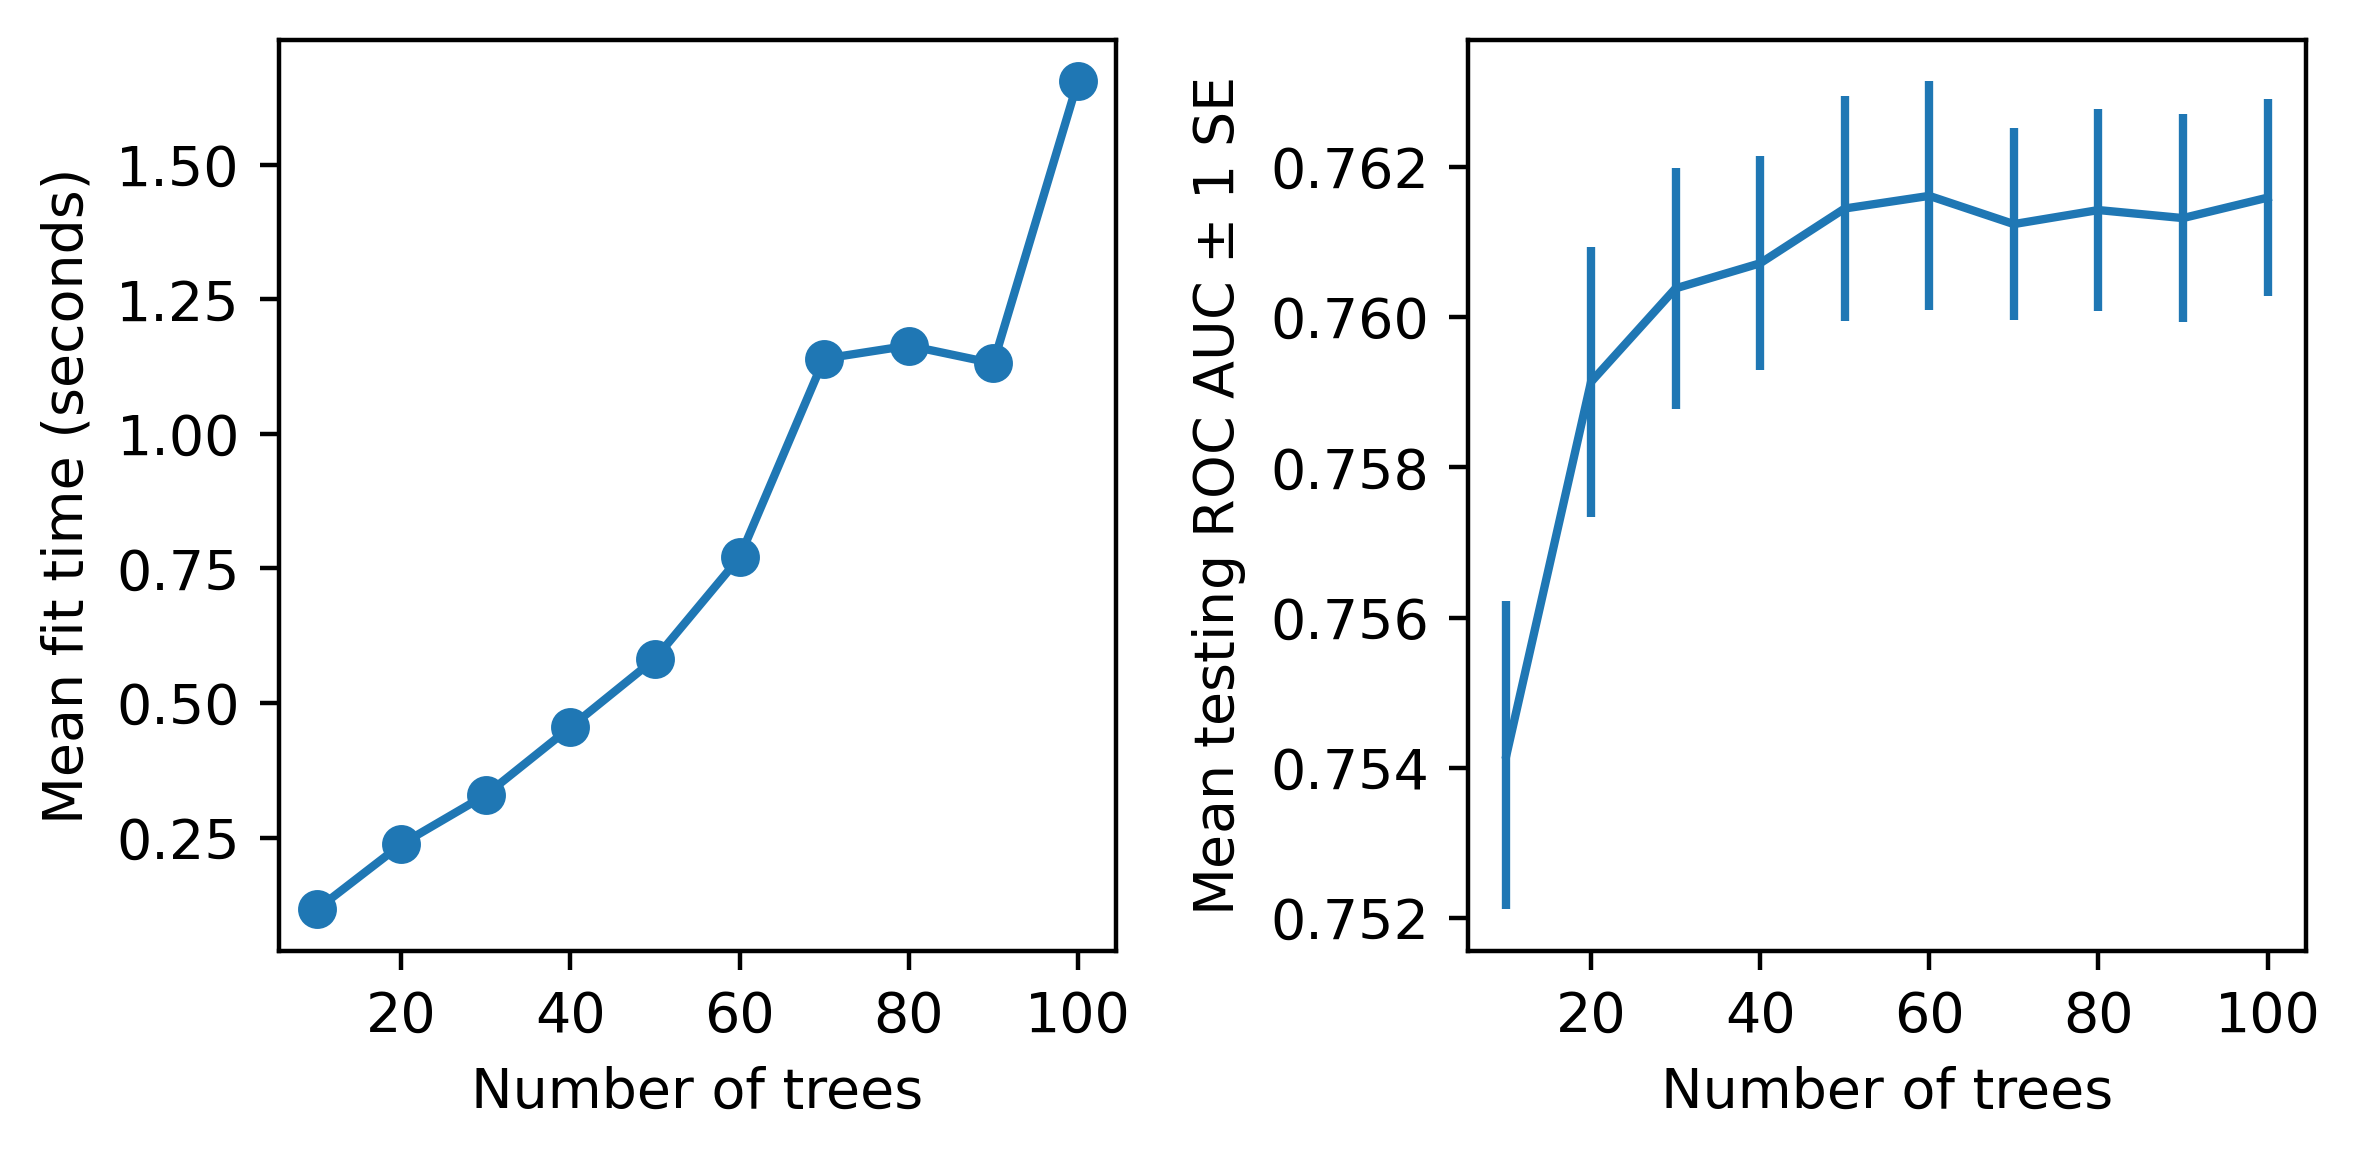

In [32]:
cv_rf_ex_results_df = pd.DataFrame(cv_rf_ex.cv_results_)
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(6, 3))
axs[0].plot(cv_rf_ex_results_df['param_n_estimators'],
cv_rf_ex_results_df['mean_fit_time'],
'-o')
axs[0].set_xlabel('Number of trees')
axs[0].set_ylabel('Mean fit time (seconds)')
axs[1].errorbar(cv_rf_ex_results_df['param_n_estimators'],
cv_rf_ex_results_df['mean_test_score'],
yerr=cv_rf_ex_results_df['std_test_score']/np.sqrt(4))
axs[1].set_xlabel('Number of trees')
axs[1].set_ylabel('Mean testing ROC AUC $\pm$ 1 SE ')
plt.tight_layout()

Đánh giá chi tiết:
1. Đánh giá Biểu đồ "Chi phí" (Mean fit time)
Biểu đồ bên trái cho thấy chi phí (thời gian huấn luyện) của mô hình. Trục tung là "giây" và trục hoành là "số lượng cây". Rõ ràng là chi phí này tăng tuyến tính: 100 cây mất khoảng 1.7 giây để huấn luyện, gấp đôi thời gian so với 60 cây (khoảng 0.75 giây). Đây là điều hoàn toàn bình thường, càng nhiều cây, mô hình càng chạy lâu hơn.

2. Đánh giá Biểu đồ "Lợi ích" (Mean testing ROC AUC)
Biểu đồ bên phải là quan trọng nhất, nó cho thấy lợi ích (hiệu suất thực tế). Nó cho thấy điểm ROC AUC thay đổi như thế nào khi bạn thêm cây. Chúng ta thấy rõ hai giai đoạn:

+ Giai đoạn 1 (10-40 cây): Hiệu suất tăng vọt. Thêm cây ở giai đoạn này mang lại lợi ích rất lớn.

+ Giai đoạn 2 (40-100 cây): Hiệu suất bị bão hòa (đi ngang). Điểm số chỉ dao động nhẹ quanh mốc 0.761 - 0.762. Việc thêm cây sau mốc 40 hầu như không mang lại lợi ích gì thêm.

3. Kết luận (Sự Đánh đổi)
Kết hợp cả hai biểu đồ, chúng ta thấy một "sự đánh đổi" (trade-off) kinh điển:

    Sau mốc 40-60 cây, bạn phải trả một "chi phí" (thời gian) ngày càng cao, để đổi lại một "lợi ích" (hiệu suất) gần như bằng không.

→ Quyết định: "Điểm cân bằng" (sweet spot) là n_estimators khoảng 40 hoặc 60. Đây là nơi bạn đạt được hiệu suất gần như tối đa mà không lãng phí thời gian tính toán.

### 3.4 Xem tham số tốt nhất của rừng cây, xem mức độ quan trọng của từng feature trong mô hình với tham số tốt nhất

Giải mã "Hộp đen" (Black Box): 

+ Mô hình Cây Quyết định (max_depth=2) của bạn rất dễ hiểu nhưng dự đoán kém.

+ Mô hình Rừng Cây (n_estimators=60) dự đoán tốt hơn nhiều nhưng lại là một "hộp đen" – bạn không thể hiểu được logic của 60 cái cây đang "bỏ phiếu" cùng lúc.

Tìm ra Yếu tố Then chốt: Biểu đồ này chính là cách "mở hộp đen". Nó cho bạn biết, trung bình trên cả 60 cây, đặc trưng nào (ví dụ: PAY_0, BILL_AMT1, LIMIT_BAL...) là yếu tố có ảnh hưởng lớn nhất đến việc một khách hàng bị dự đoán là "Vỡ nợ".

Cung cấp Giá trị Kinh doanh: Thay vì chỉ nói "Mô hình này dự đoán đúng 80%", bạn có thể nói với sếp của mình: "Mô hình đã học được rằng 'trạng thái thanh toán của tháng trước' (PAY_0) và 'dư nợ hóa đơn tháng trước' (BILL_AMT1) là hai yếu tố dự báo rủi ro quan trọng nhất."

In [ ]:
# {'n_estimators': 60}
cv_rf_ex.best_params_


{'n_estimators': 60}

<Axes: >

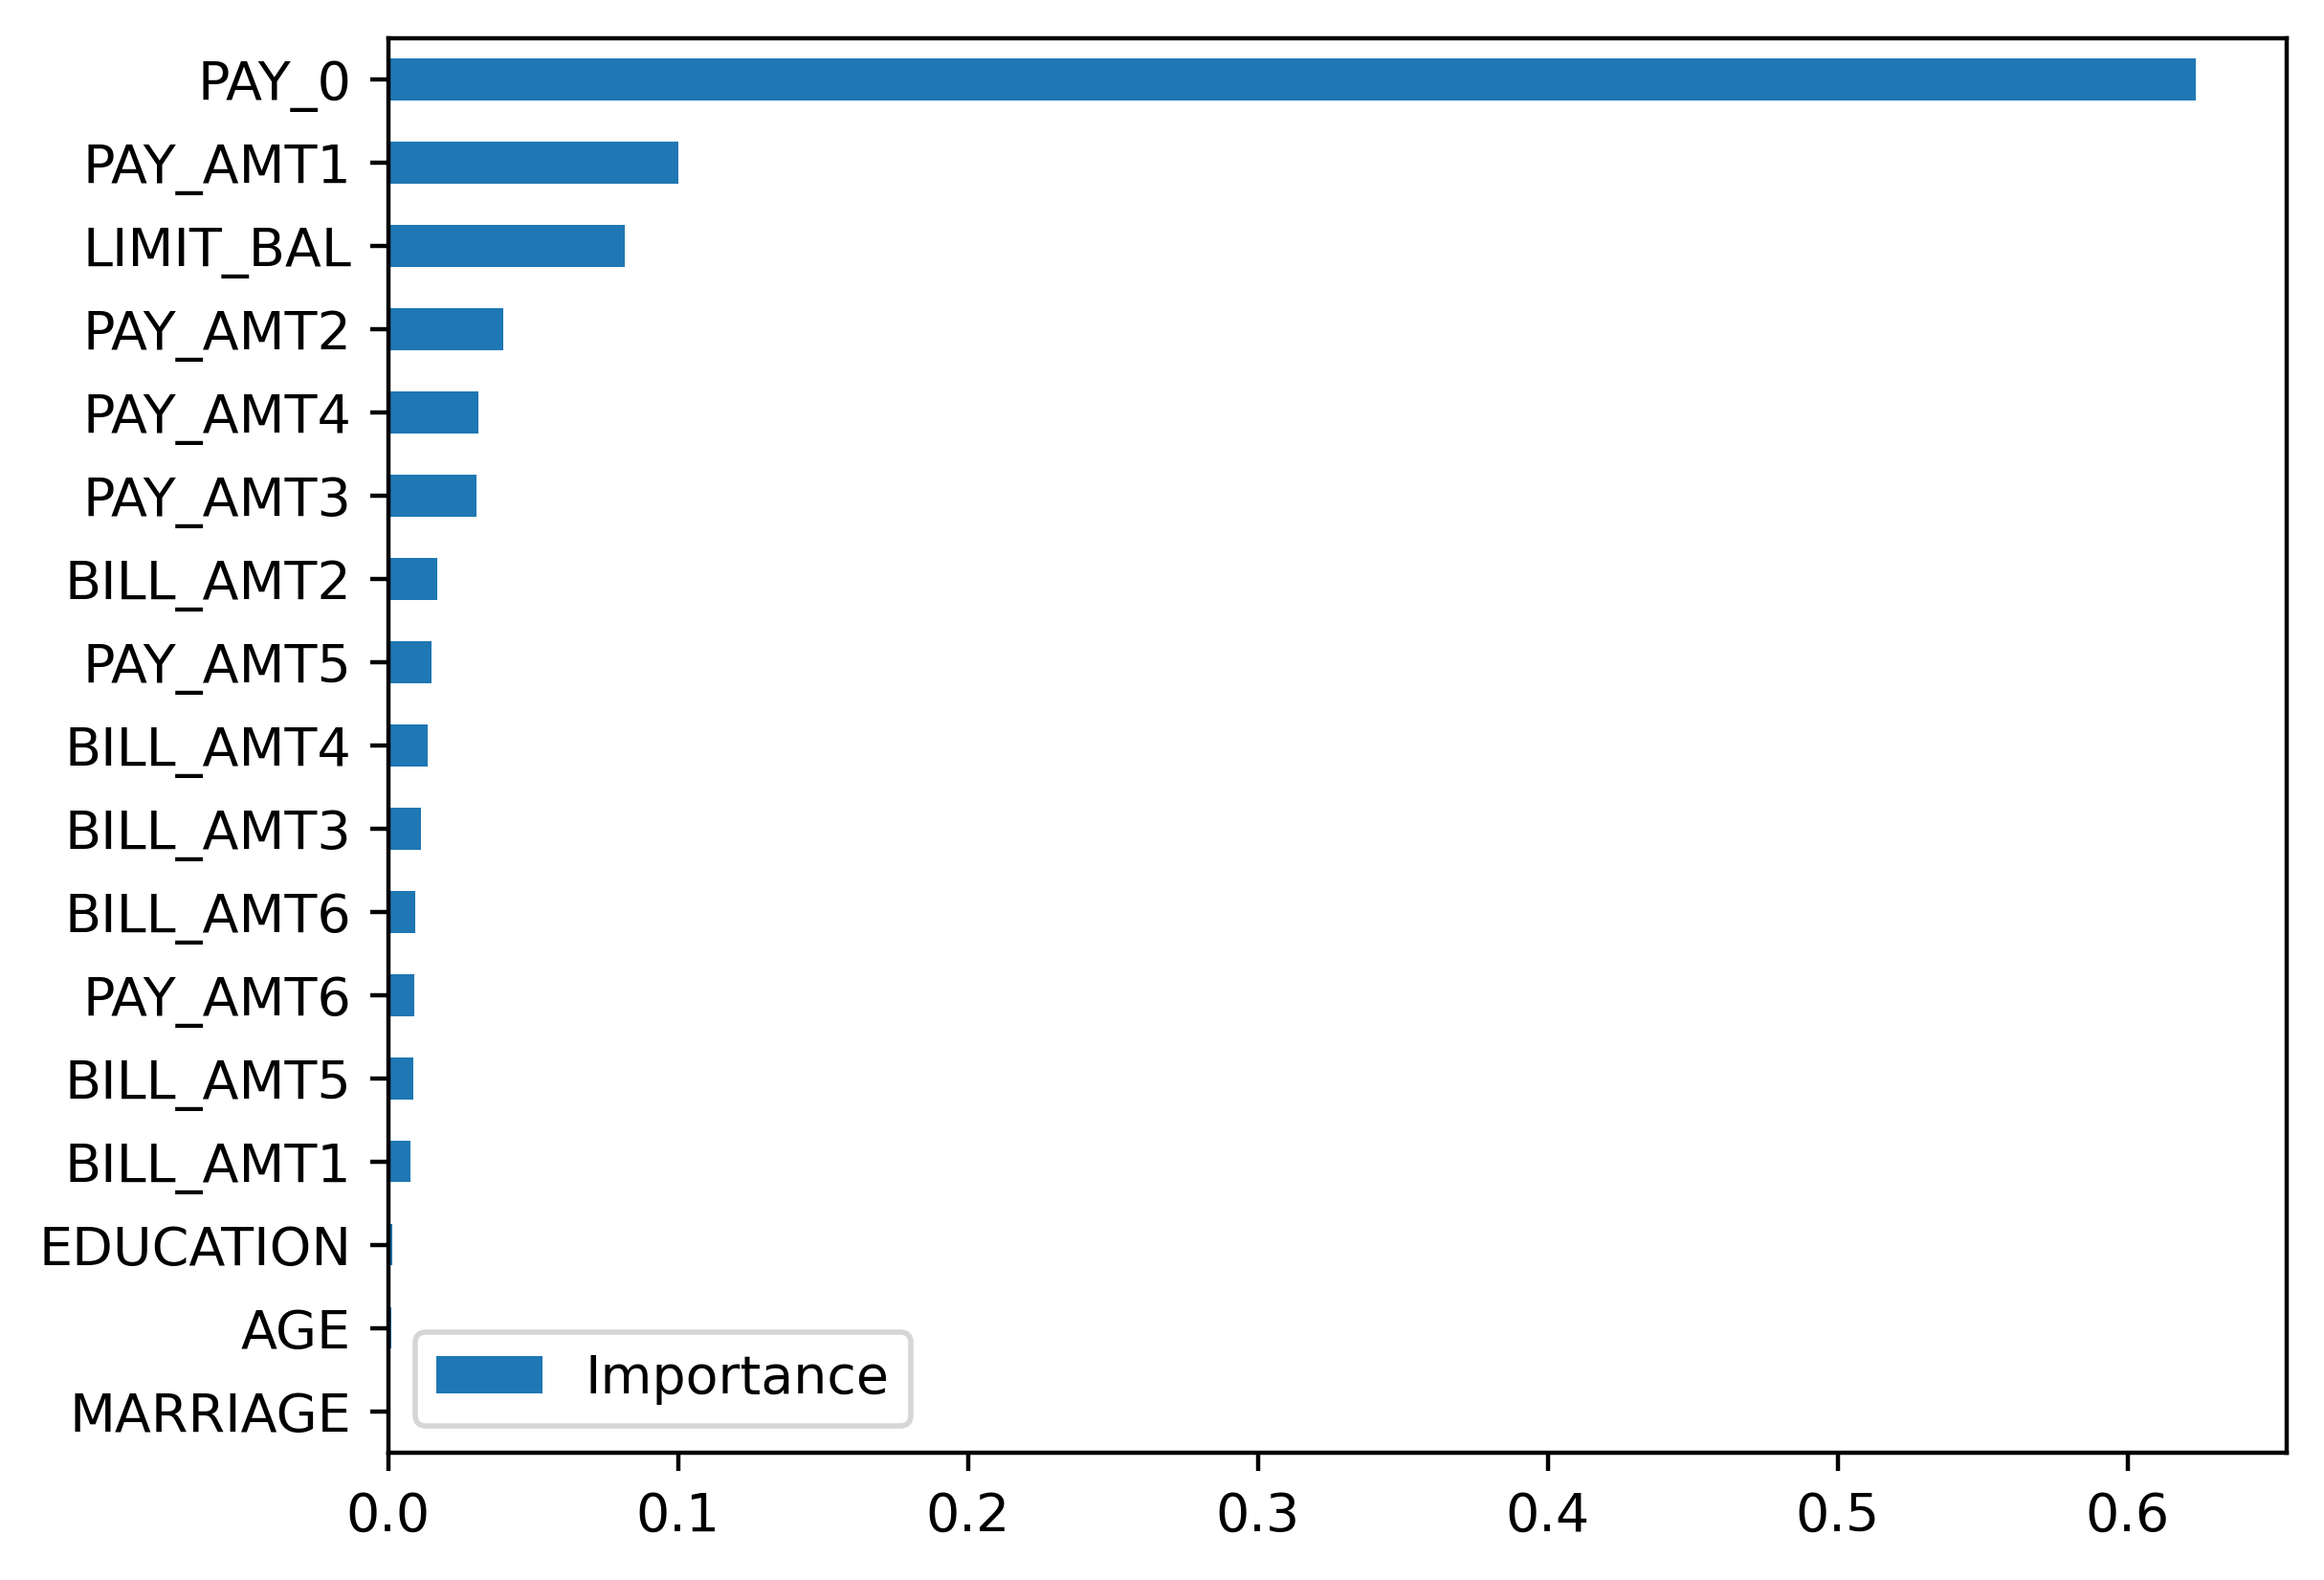

In [36]:
# tên tính năng và tầm quan trọng
feat_imp_df = pd.DataFrame({
    'Importance':cv_rf_ex.best_estimator_.feature_importances_},
    index=features_response[:-1])
feat_imp_df.sort_values('Importance', ascending=True).plot.barh()

Nhận xét: 

+ PAY_0 là quan trọng nhất: Trạng thái thanh toán của tháng gần nhất (PAY_0) chiếm hơn 60% sức mạnh dự đoán. Đây là yếu tố then chốt.

+ Hành vi Tài chính là thứ yếu: Các yếu tố quan trọng tiếp theo đều là về tiền bạc, như PAY_AMT1 (số tiền đã trả) và LIMIT_BAL (hạn mức).

+ Nhân khẩu học không quan trọng: Mô hình đã học được rằng AGE (Tuổi), EDUCATION (Học vấn), và MARRIAGE (Hôn nhân) gần như vô dụng (điểm gần bằng 0) trong việc dự đoán vỡ nợ.

→ Kết luận: Cả mô hình Cây Quyết định đơn giản và mô hình Rừng Cây (60 cây) phức tạp đều đi đến cùng một kết luận: PAY_0 là đặc trưng then chốt. Điều này cho bạn sự tự tin rất lớn rằng đây là một phát hiện quan trọng và chính xác.

### 3.5 Kết luận

Việc xây dựng mô hình Random Forest giúp khắc phục nhược điểm của Cây Quyết định đơn giản — vốn bỏ sót tới 66% khách hàng rủi ro. Thông qua quá trình tinh chỉnh siêu tham số (Hyperparameter Tuning), mô hình tối ưu được xác định với n_estimators ≈ 40–60, đạt hiệu suất ROC AUC ~0.762, cân bằng tốt giữa độ chính xác và thời gian huấn luyện.

Phân tích biểu đồ cho thấy hiệu suất mô hình tăng mạnh đến khoảng 40 cây rồi bão hòa, nên việc thêm cây sau đó không mang lại lợi ích đáng kể — đây là “điểm cân bằng tối ưu (sweet spot)” giữa chi phí và hiệu quả.

Về ý nghĩa thực tiễn, biểu đồ tầm quan trọng của các đặc trưng cho thấy:

+ PAY_0 (trạng thái thanh toán gần nhất) là yếu tố quyết định rủi ro vỡ nợ, chiếm hơn 60% sức mạnh dự đoán.

+ Các yếu tố tài chính như BILL_AMT1 và LIMIT_BAL có ảnh hưởng thứ yếu.

+ Các đặc trưng nhân khẩu học (AGE, EDUCATION, MARRIAGE) hầu như không đóng vai trò đáng kể.

→ Tổng kết: Mô hình Rừng Cây đã chứng minh khả năng dự đoán mạnh mẽ, ổn định và đáng tin cậy hơn hẳn Cây Quyết định. Nó không chỉ tăng hiệu suất dự đoán mà còn giúp giải thích rủi ro tài chính một cách trực quan: khách hàng có dấu hiệu trễ thanh toán (PAY_0 > 1) là nhóm cần được cảnh báo và kiểm soát chặt chẽ nhất.

## 4. Tổng kết

Báo cáo tập trung vào việc triển khai và đánh giá hai mô hình học máy chính: Cây Quyết định (Decision Tree) và Rừng Cây (Random Forest) nhằm dự đoán khả năng vỡ nợ của khách hàng.

Mô hình Cây Quyết định (max_depth = 6) cho thấy khả năng diễn giải cao nhưng hiệu suất hạn chế, đặc biệt khi bỏ sót tới 66% khách hàng rủi ro (Recall = 0.34) — biểu hiện của underfitting. Để cải thiện, nhóm đã áp dụng GridSearchCV để tìm tham số tối ưu, giúp cân bằng giữa độ chính xác (accuracy) và khả năng tổng quát hóa (generalization).

Kết quả cho thấy Rừng Cây (Random Forest) với n_estimators ≈ 40–60 đạt hiệu suất tốt nhất (ROC AUC ≈ 0.76), vừa ổn định vừa tránh overfitting. Phân tích tầm quan trọng của đặc trưng khẳng định PAY_0 (trạng thái thanh toán gần nhất) là yếu tố dự báo vỡ nợ quan trọng nhất, trong khi các yếu tố nhân khẩu học (AGE, EDUCATION, MARRIAGE) ảnh hưởng rất nhỏ.

→ Kết luận: Mô hình Rừng Cây, sau khi tinh chỉnh tham số, cho hiệu quả vượt trội và đáng tin cậy hơn hẳn Cây Quyết định, minh chứng cho sức mạnh của kỹ thuật tối ưu hóa siêu tham số (hyperparameter tuning) trong việc nâng cao chất lượng dự đoán và khả năng ứng dụng thực tế.